In [871]:
#선형,다항회귀
#sgd
#릿지,라쏘,엘라스틱넷
#svmregression,randomforestRegression

In [872]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv("FIFA_train.csv")

In [873]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.00000,94,94,4.00000,110500000.00000
1,3,De Gea,27,europe,2020,GK,right,4.00000,91,93,1.00000,72000000.00000
2,7,L. Suárez,31,south america,2021,ST,right,5.00000,91,91,3.00000,80000000.00000
3,8,Sergio Ramos,32,europe,2020,DF,right,4.00000,91,91,3.00000,51000000.00000
4,9,J. Oblak,25,europe,2021,GK,right,3.00000,90,93,1.00000,68000000.00000


In [874]:
test=pd.read_csv('FIFA_test.csv')

In [875]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.00000,94,94,5.00000
1,2,Neymar Jr,26,south america,2022,ST,right,5.00000,92,93,5.00000
2,4,K. De Bruyne,27,europe,2023,MF,right,4.00000,91,92,4.00000
3,5,E. Hazard,27,europe,2020,ST,right,4.00000,91,91,4.00000
4,6,L. Modrić,32,europe,2020,MF,right,4.00000,91,91,4.00000


In [876]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [877]:
train['prefer_foot'].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [878]:
from sklearn.preprocessing import LabelEncoder

In [879]:
foot_encoder=LabelEncoder()
train['prefer_foot']=foot_encoder.fit_transform(train['prefer_foot'])

In [880]:
foot_encoder.classes_

array(['left', 'right'], dtype=object)

In [881]:
train['continent'].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [882]:
continent_encoder=LabelEncoder()
train['continent']=continent_encoder.fit_transform(train['continent'])

In [883]:
continent_encoder.classes_

array(['africa', 'asia', 'europe', 'oceania', 'south america'],
      dtype=object)

In [884]:
position_encoder=LabelEncoder()
train['position']=position_encoder.fit_transform(train['position'])

In [885]:
position_encoder.classes_

array(['DF', 'GK', 'MF', 'ST'], dtype=object)

In [886]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [887]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   int32  
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   int32  
 6   prefer_foot       8932 non-null   int32  
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int32(3), int64(4), object(2)
memory usage: 732.8+ KB


In [888]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,4,2021,3,0,5.00000,94,94,4.00000,110500000.00000
1,3,De Gea,27,2,2020,1,1,4.00000,91,93,1.00000,72000000.00000
2,7,L. Suárez,31,4,2021,3,1,5.00000,91,91,3.00000,80000000.00000
3,8,Sergio Ramos,32,2,2020,0,1,4.00000,91,91,3.00000,51000000.00000
4,9,J. Oblak,25,2,2021,1,1,3.00000,90,93,1.00000,68000000.00000


In [889]:
train.corr()

,id,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.00000,-0.47578,-0.10625,-0.01350,0.03721,-0.42374,-0.97237,-0.63020,-0.40246,-0.54428
age,-0.47578,1.00000,0.09103,-0.07913,0.00776,0.26347,0.46735,-0.23130,0.03936,0.08732
continent,-0.10625,0.09103,1.00000,-0.02005,-0.01931,0.01261,0.09949,0.07231,0.01237,0.03955
position,-0.01350,-0.07913,-0.02005,1.00000,0.10550,0.03122,0.01582,0.06923,0.38402,0.07498
prefer_foot,0.03721,0.00776,-0.01931,0.10550,1.00000,0.00386,-0.03658,-0.02903,-0.10911,-0.00820
reputation,-0.42374,0.26347,0.01261,0.03122,0.00386,1.00000,0.52139,0.39918,0.19658,0.66598
stat_overall,-0.97237,0.46735,0.09949,0.01582,-0.03658,0.52139,1.00000,0.66545,0.40016,0.65844
stat_potential,-0.63020,-0.23130,0.07231,0.06923,-0.02903,0.39918,0.66545,1.00000,0.33258,0.61191
stat_skill_moves,-0.40246,0.03936,0.01237,0.38402,-0.10911,0.19658,0.40016,0.33258,1.00000,0.29850
value,-0.54428,0.08732,0.03955,0.07498,-0.00820,0.66598,0.65844,0.61191,0.29850,1.00000


In [890]:
train['contract_until']=train['contract_until'].str[-4:].astype('int')

In [891]:
train['contract_until']=train['contract_until']-2018

In [892]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,4,3,3,0,5.00000,94,94,4.00000,110500000.00000
1,3,De Gea,27,2,2,1,1,4.00000,91,93,1.00000,72000000.00000
2,7,L. Suárez,31,4,3,3,1,5.00000,91,91,3.00000,80000000.00000
3,8,Sergio Ramos,32,2,2,0,1,4.00000,91,91,3.00000,51000000.00000
4,9,J. Oblak,25,2,3,1,1,3.00000,90,93,1.00000,68000000.00000


In [893]:
train.corr()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.00000,-0.47578,-0.10625,-0.14320,-0.01350,0.03721,-0.42374,-0.97237,-0.63020,-0.40246,-0.54428
age,-0.47578,1.00000,0.09103,-0.13205,-0.07913,0.00776,0.26347,0.46735,-0.23130,0.03936,0.08732
continent,-0.10625,0.09103,1.00000,0.04091,-0.02005,-0.01931,0.01261,0.09949,0.07231,0.01237,0.03955
contract_until,-0.14320,-0.13205,0.04091,1.00000,0.02008,-0.00476,0.07045,0.15698,0.25848,0.08264,0.22864
position,-0.01350,-0.07913,-0.02005,0.02008,1.00000,0.10550,0.03122,0.01582,0.06923,0.38402,0.07498
prefer_foot,0.03721,0.00776,-0.01931,-0.00476,0.10550,1.00000,0.00386,-0.03658,-0.02903,-0.10911,-0.00820
reputation,-0.42374,0.26347,0.01261,0.07045,0.03122,0.00386,1.00000,0.52139,0.39918,0.19658,0.66598
stat_overall,-0.97237,0.46735,0.09949,0.15698,0.01582,-0.03658,0.52139,1.00000,0.66545,0.40016,0.65844
stat_potential,-0.63020,-0.23130,0.07231,0.25848,0.06923,-0.02903,0.39918,0.66545,1.00000,0.33258,0.61191
stat_skill_moves,-0.40246,0.03936,0.01237,0.08264,0.38402,-0.10911,0.19658,0.40016,0.33258,1.00000,0.29850


In [894]:
X_train,y_train=train.drop('value',axis=1),train['value']

In [895]:
X_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,0,L. Messi,31,4,3,3,0,5.00000,94,94,4.00000
1,3,De Gea,27,2,2,1,1,4.00000,91,93,1.00000
2,7,L. Suárez,31,4,3,3,1,5.00000,91,91,3.00000
3,8,Sergio Ramos,32,2,2,0,1,4.00000,91,91,3.00000
4,9,J. Oblak,25,2,3,1,1,3.00000,90,93,1.00000
...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,0,1,2,1,1.00000,48,63,3.00000
8928,16936,C. Ehlich,19,2,2,0,1,1.00000,47,59,2.00000
8929,16941,N. Fuentes,18,4,3,0,1,1.00000,47,64,2.00000
8930,16942,J. Milli,18,2,3,1,1,1.00000,47,65,1.00000


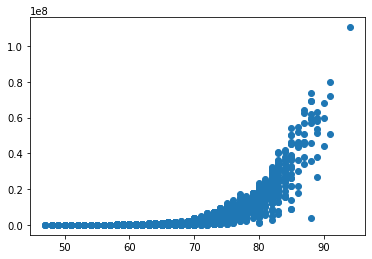

In [896]:
plt.scatter(train['stat_overall'],train['value'])

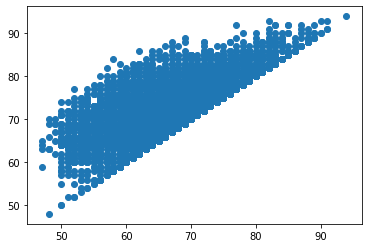

In [897]:
plt.scatter(train['stat_overall'],train['stat_potential'])

In [898]:
train=train.drop('name',axis=1)

In [899]:
train

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,4,3,3,0,5.00000,94,94,4.00000,110500000.00000
1,3,27,2,2,1,1,4.00000,91,93,1.00000,72000000.00000
2,7,31,4,3,3,1,5.00000,91,91,3.00000,80000000.00000
3,8,32,2,2,0,1,4.00000,91,91,3.00000,51000000.00000
4,9,25,2,3,1,1,3.00000,90,93,1.00000,68000000.00000
...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,18,0,1,2,1,1.00000,48,63,3.00000,60000.00000
8928,16936,19,2,2,0,1,1.00000,47,59,2.00000,40000.00000
8929,16941,18,4,3,0,1,1.00000,47,64,2.00000,50000.00000
8930,16942,18,2,3,1,1,1.00000,47,65,1.00000,50000.00000


In [900]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   int32  
 4   contract_until    8932 non-null   int32  
 5   position          8932 non-null   int32  
 6   prefer_foot       8932 non-null   int32  
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
dtypes: float64(2), int32(4), int64(4), object(1)
memory usage: 628.2+ KB


In [901]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   int32  
 4   contract_until    8932 non-null   int32  
 5   position          8932 non-null   int32  
 6   prefer_foot       8932 non-null   int32  
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
dtypes: float64(2), int32(4), int64(4), object(1)
memory usage: 628.2+ KB


In [902]:
X_train['reputation'].unique()

array([5., 4., 3., 1., 2.])

In [903]:
X_train=X_train.drop("name",axis=1)

In [904]:
X_train['stat_skill_moves'].unique()

array([4., 1., 3., 2., 5.])

In [905]:
X_train=X_train.astype("int")

In [906]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                8932 non-null   int32
 1   age               8932 non-null   int32
 2   continent         8932 non-null   int32
 3   contract_until    8932 non-null   int32
 4   position          8932 non-null   int32
 5   prefer_foot       8932 non-null   int32
 6   reputation        8932 non-null   int32
 7   stat_overall      8932 non-null   int32
 8   stat_potential    8932 non-null   int32
 9   stat_skill_moves  8932 non-null   int32
dtypes: int32(10)
memory usage: 349.0 KB


In [907]:
X_train=X_train.drop('id',axis=1)
X_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,4,3,3,0,5,94,94,4
1,27,2,2,1,1,4,91,93,1
2,31,4,3,3,1,5,91,91,3
3,32,2,2,0,1,4,91,91,3
4,25,2,3,1,1,3,90,93,1
...,...,...,...,...,...,...,...,...,...
8927,18,0,1,2,1,1,48,63,3
8928,19,2,2,0,1,1,47,59,2
8929,18,4,3,0,1,1,47,64,2
8930,18,2,3,1,1,1,47,65,1


In [908]:
train=train.drop('id',axis=1)

In [909]:
train=train.astype('int')
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,4,3,3,0,5,94,94,4,110500000
1,27,2,2,1,1,4,91,93,1,72000000
2,31,4,3,3,1,5,91,91,3,80000000
3,32,2,2,0,1,4,91,91,3,51000000
4,25,2,3,1,1,3,90,93,1,68000000
...,...,...,...,...,...,...,...,...,...,...
8927,18,0,1,2,1,1,48,63,3,60000
8928,19,2,2,0,1,1,47,59,2,40000
8929,18,4,3,0,1,1,47,64,2,50000
8930,18,2,3,1,1,1,47,65,1,50000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'continent'}>,
        <AxesSubplot:title={'center':'contract_until'}>],
       [<AxesSubplot:title={'center':'position'}>,
        <AxesSubplot:title={'center':'prefer_foot'}>,
        <AxesSubplot:title={'center':'reputation'}>],
       [<AxesSubplot:title={'center':'stat_overall'}>,
        <AxesSubplot:title={'center':'stat_potential'}>,
        <AxesSubplot:title={'center':'stat_skill_moves'}>]], dtype=object)

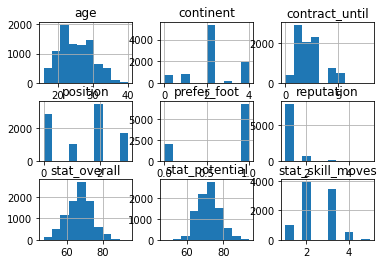

In [910]:
X_train.hist()

<AxesSubplot:>

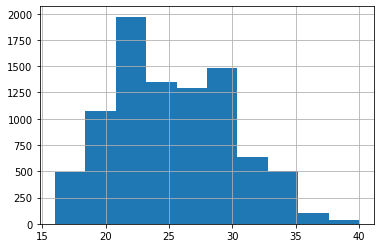

In [911]:
X_train['age'].hist()

<AxesSubplot:>

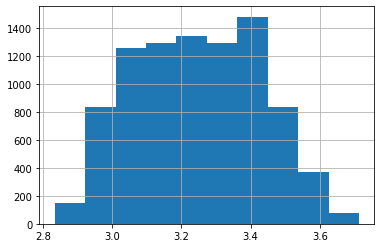

In [912]:
np.log1p(X_train['age']).hist()

<AxesSubplot:>

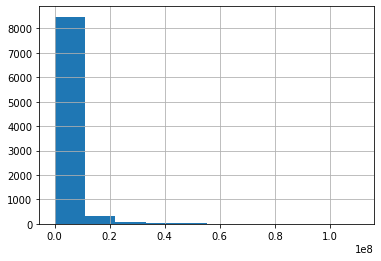

In [913]:
y_train.hist()

<AxesSubplot:>

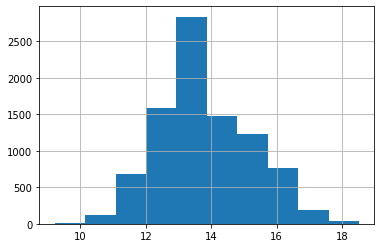

In [914]:
np.log1p(y_train).hist()

In [915]:
X_train[['age','stat_potential','reputation']]=np.log1p(X_train[['age','stat_potential','reputation']])

<AxesSubplot:>

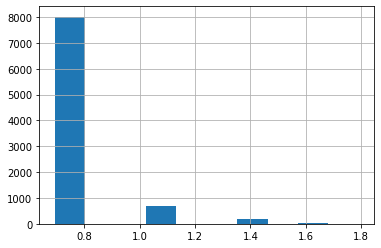

In [916]:
X_train['reputation'].hist()

In [917]:
y_train=np.log1p(y_train)

<AxesSubplot:>

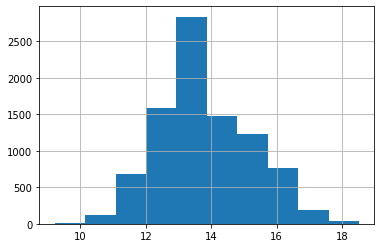

In [918]:
y_train.hist()

In [919]:
from sklearn.ensemble import RandomForestRegressor

In [920]:
rf_reg=RandomForestRegressor()

In [921]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [922]:
#########test##########################################

In [923]:
test['continent']=continent_encoder.transform(test['continent'])
test['position']=position_encoder.transform(test['position'])
test['prefer_foot']=foot_encoder.transform(test['prefer_foot'])
test['contract_until']=test['contract_until'].str[-4:].astype('int')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   int32  
 4   contract_until    3828 non-null   int32  
 5   position          3828 non-null   int32  
 6   prefer_foot       3828 non-null   int32  
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int32(4), int64(4), object(1)
memory usage: 269.3+ KB


In [924]:
test['contract_until']=test['contract_until']-2018

In [925]:
test=test.drop(['id','name'],axis=1)
test=test.astype("int")

In [926]:
test[['age', 'stat_potential','reputation']] = np.log1p(test[['age', 'stat_potential','reputation']])

In [928]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [929]:
test=pd.DataFrame(scaler.fit_transform(test),columns=test.columns)

In [983]:
test

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1.55213,-0.19050,1.35670,1.39883,0.55965,6.48533,3.85978,3.18035,3.30985
1,0.23789,1.59901,1.35670,1.39883,0.55965,6.48533,3.57026,3.05356,3.30985
2,0.44522,-0.19050,2.12531,0.51536,0.55965,5.35328,3.42549,2.92541,2.02952
3,0.44522,-0.19050,-0.18051,1.39883,0.55965,5.35328,3.42549,2.79588,2.02952
4,1.38193,-0.19050,-0.18051,0.51536,0.55965,5.35328,3.42549,2.79588,2.02952
...,...,...,...,...,...,...,...,...,...
3823,-1.19488,-1.08525,0.58810,0.51536,0.55965,-0.33606,-2.79925,-1.55233,-0.53113
3824,-1.76547,-0.19050,-1.71771,-0.36811,0.55965,-0.33606,-2.79925,-1.18363,-1.81145
3825,-1.76547,1.59901,0.58810,0.51536,0.55965,-0.33606,-2.79925,-1.18363,-0.53113
3826,-1.76547,-0.19050,-0.18051,1.39883,0.55965,-0.33606,-2.94401,-1.93273,-0.53113


In [981]:
X_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1.21994,1.60672,0.63595,1.38111,-1.80651,6.84045,3.92571,3.26349,2.05965
1,0.46286,-0.18004,-0.15342,-0.40453,0.55355,5.65172,3.48804,3.13405,-1.80631
2,1.21994,1.60672,0.63595,1.38111,0.55355,6.84045,3.48804,2.87099,0.77100
3,1.39440,-0.18004,-0.15342,-1.29734,0.55355,5.65172,3.48804,2.87099,0.77100
4,0.04269,-0.18004,0.63595,-0.40453,0.55355,4.19684,3.34215,3.13405,-1.80631
...,...,...,...,...,...,...,...,...,...
8927,-1.73564,-1.96679,-0.94279,0.48829,0.55355,-0.32245,-2.78519,-1.56804,0.77100
8928,-1.44483,-0.18004,-0.15342,-1.29734,0.55355,-0.32245,-2.93108,-2.35747,-0.51765
8929,-1.73564,1.60672,0.63595,-1.29734,0.55355,-0.32245,-2.93108,-1.37839,-0.51765
8930,-1.73564,-0.18004,0.63595,-0.40453,0.55355,-0.32245,-2.93108,-1.19164,-1.80631


In [930]:
test

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1.55213,-0.19050,1.35670,1.39883,0.55965,6.48533,3.85978,3.18035,3.30985
1,0.23789,1.59901,1.35670,1.39883,0.55965,6.48533,3.57026,3.05356,3.30985
2,0.44522,-0.19050,2.12531,0.51536,0.55965,5.35328,3.42549,2.92541,2.02952
3,0.44522,-0.19050,-0.18051,1.39883,0.55965,5.35328,3.42549,2.79588,2.02952
4,1.38193,-0.19050,-0.18051,0.51536,0.55965,5.35328,3.42549,2.79588,2.02952
...,...,...,...,...,...,...,...,...,...
3823,-1.19488,-1.08525,0.58810,0.51536,0.55965,-0.33606,-2.79925,-1.55233,-0.53113
3824,-1.76547,-0.19050,-1.71771,-0.36811,0.55965,-0.33606,-2.79925,-1.18363,-1.81145
3825,-1.76547,1.59901,0.58810,0.51536,0.55965,-0.33606,-2.79925,-1.18363,-0.53113
3826,-1.76547,-0.19050,-0.18051,1.39883,0.55965,-0.33606,-2.94401,-1.93273,-0.53113


In [984]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()

In [985]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [999]:
params={'max_depth':[4,6,8,10],'n_estimators':[3,4,5],'learning_rate':[0.01,0.05,0.1,0.3]}
grid_cv=GridSearchCV(gbr,param_grid=params,cv=5,scoring='neg_mean_squared_error',refit=True)

In [1000]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [3, 4, 5]},
             scoring='neg_mean_squared_error')

In [1001]:
grid_cv.best_params_

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 5}

In [1002]:
best_grid=grid_cv.best_estimator_

In [1003]:
y_pred=best_grid.predict(test)

In [1004]:
np.expm1(y_pred)

array([38982484.592861, 43443506.820932, 40871418.136572, ...,
          96717.743314,    82925.937253,    83829.814767])

In [938]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [939]:
from sklearn.model_selection import GridSearchCV

In [957]:
params={'max_depth':[12,13,14,15],'max_features':[6,7,8,9]}

In [958]:
grid_cv=GridSearchCV(rf_reg,param_grid=params,cv=5,refit=True,scoring='neg_mean_squared_error')

In [959]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': [6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [960]:
grid_cv.best_params_

{'max_depth': 13, 'max_features': 8}

In [961]:
best_grid=grid_cv.best_estimator_
best_grid.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, max_features=8)

In [974]:
grid_cv.best_score_

-0.3565669583523019

In [975]:
y_pred=best_grid.predict(test)

In [976]:
submit=np.expm1(y_pred)

In [977]:
submit

array([56021398.130808, 75301450.571237, 66127206.215893, ...,
          58558.568767,    49761.450345,    50485.327584])

In [971]:
from sklearn.model_selection import cross_val_score

In [972]:
score=cross_val_score(best_grid,X_train,y_train,scoring='neg_mean_squared_error')

In [973]:
-score

array([0.754403, 0.233044, 0.024917, 0.035246, 0.759383])

In [714]:
y_pred=np.expm1(y_pred)

In [715]:
y_pred

array([47339841.362128, 81367411.290321, 68734833.122578, ...,
          59915.548307,    48650.876158,    49280.37843 ])

In [712]:
submission=pd.read_csv("submission.csv")

In [713]:
##############################################################제출파일 만들기###################
##################
##############################################

In [978]:
submission['value']=submit

In [979]:
submission

,id,value
0,1,56021398.13081
1,2,75301450.57124
2,4,66127206.21589
3,5,66271356.74258
4,6,58964351.22677
...,...,...
3823,16924,59764.77454
3824,16929,49754.71102
3825,16932,58558.56877
3826,16937,49761.45034


In [980]:
submission.to_csv("soccer_submit.csv",index=False)

In [ ]:
test